# 1) Delivery_time -> Predict delivery time using sorting time 


In [16]:
import pandas as pd

In [17]:
dt=pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [58]:
# renaming columns
dt1=dt.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
dt1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [59]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [60]:
dt1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [61]:
dt1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


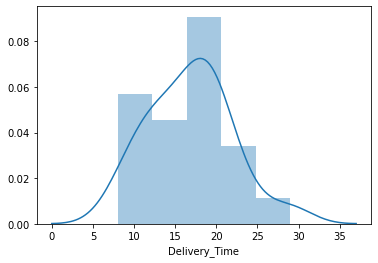

In [62]:
sns.distplot(dt1['Delivery_Time'])

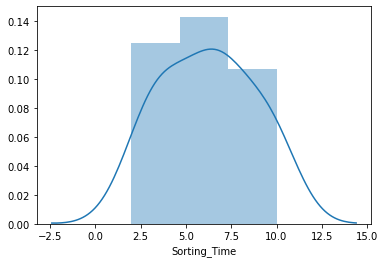

In [63]:
sns.distplot(dt1['Sorting_Time'])

In [64]:
import statsmodels.formula.api as smf

In [67]:
# fitting the model using ols method
model=smf.ols('Delivery_Time~Sorting_Time',data=dt1).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 09 May 2022   Prob (F-statistic):           3.98e-06
Time:                        22:32:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coef of determination (R^2) is 0.682 , so accuracy is around 68%
prob is very small so we reject H0 

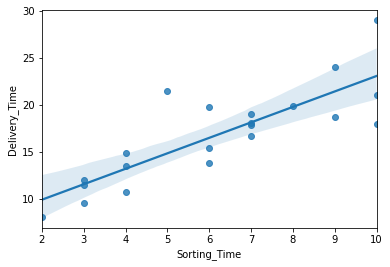

In [69]:
# regression plot 
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=dt1)

In [70]:
# prediction
Sort_time = pd.Series([15,16,17,18,19,20])

In [74]:
Sort_df=pd.DataFrame(Sort_time,columns=['Sorting_Time'])
Sort_df

,Sorting_Time
0,15
1,16
2,17
3,18
4,19
5,20


In [76]:
Dt_pred= model.predict(Sort_df)
Dt_pred

0    31.318032
1    32.967052
2    34.616072
3    36.265092
4    37.914112
5    39.563132
dtype: float64

In [78]:
model_dt=pd.DataFrame({'Sorting_time':[15,16,17,18,19,20],"Delivery_time":Dt_pred})
model_dt

,Sorting_time,Delivery_time
0,15,31.318032
1,16,32.967052
2,17,34.616072
3,18,36.265092
4,19,37.914112
5,20,39.563132


# 2) Salary_hike -> Build a prediction model for Salary_hike


In [28]:
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [30]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
# correlation between salary and years experience 
salary.corr()
# high positive corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


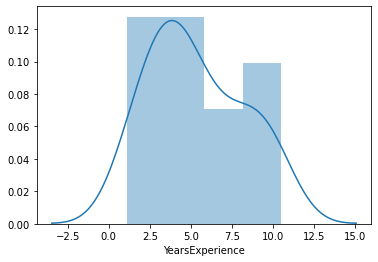

In [32]:
# distribution plot of independent var
sns.distplot(salary['YearsExperience'])

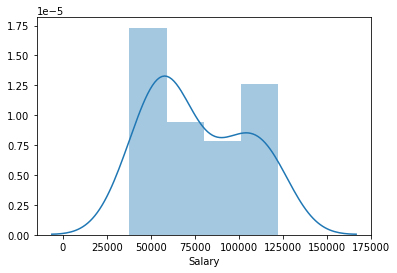

In [33]:
# distribution plot of dependent var
sns.distplot(salary['Salary'])

In [34]:
# Fitting the model
model_sal=smf.ols('Salary~YearsExperience',data=salary).fit()

In [35]:
model_sal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.14e-20
Time:                        20:22:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# model parameters
model_sal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

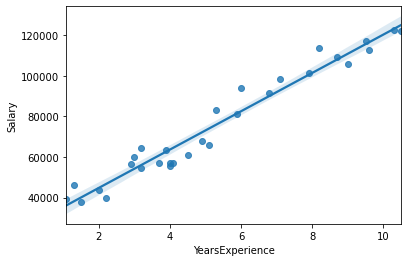

In [39]:
# regression plot
sns.regplot(x='YearsExperience',y='Salary',data=salary)

In [40]:
# r sq and adj r sq values
(model_sal.rsquared,model_sal.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [44]:
# Years experience
Sal_hike = pd.Series([20,25,30,35,40,45,50])

In [46]:
# dataframe of years experience
pred_sal=pd.DataFrame(Sal_hike,columns=['YearsExperience'])
pred_sal

,YearsExperience
0,20
1,25
2,30
3,35
4,40
5,45
6,50


In [49]:
#Predicted Salary hike
x=model_sal.predict(pred_sal)
x

0    214791.446628
1    262041.258235
2    309291.069842
3    356540.881450
4    403790.693057
5    451040.504664
6    498290.316271
dtype: float64

In [54]:
Sal_exp = pd.DataFrame({'Yrs Exp':[20,25,30,35,40,45,50],
                        'Sal_hike':x})

In [55]:
Sal_exp

,Yrs Exp,Sal_hike
0,20,214791.446628
1,25,262041.258235
2,30,309291.069842
3,35,356540.881450
4,40,403790.693057
5,45,451040.504664
6,50,498290.316271
